In [9]:
import numpy as np
import matplotlib.pyplot as plt

from qnlmodels.klopfenstein_taper import KlopfensteinTaper
from qnlmodels.cpw import CPW
from qnlmodels.rev_kerr_match_impedance import MatchImpedance

Junction ratio at 50 Ohms: r = 0.035
Junction ratio at amplification impedance: r = 0.234


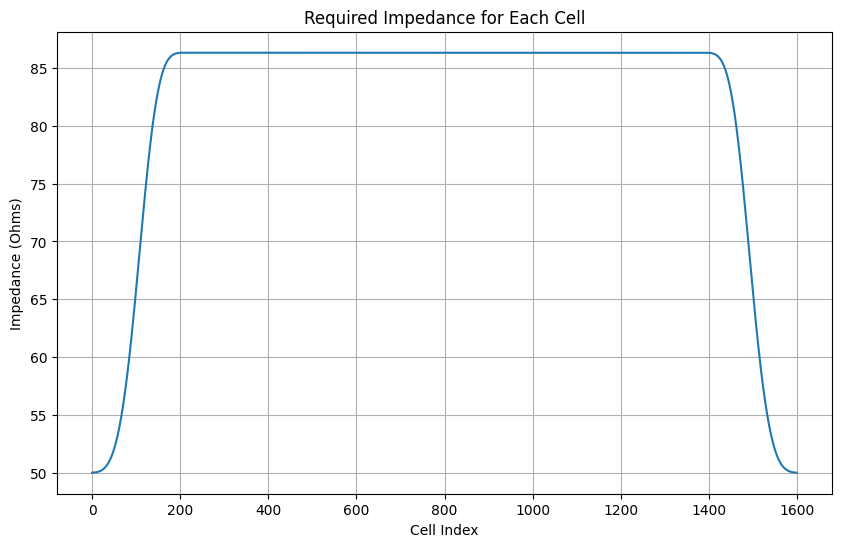

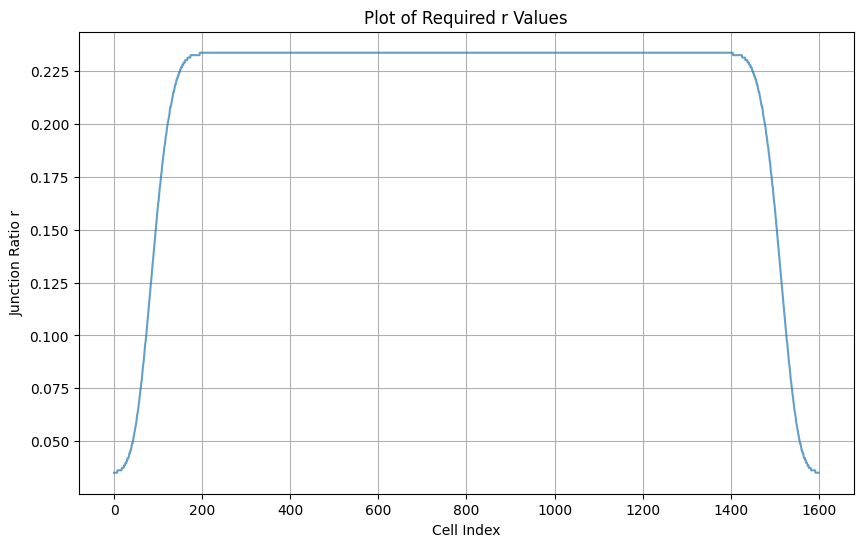

In [10]:
# Parameters for MatchImpedance
J0 = 6e-6  # A/um^2
A = 0.4 * 2.75  # um^2
r_range = np.linspace(0.02, 0.25, 200)  # Range of r values
Cg_range = np.linspace(45e-15, 200e-15, 200)  # Range of Cg values

# Parameters for KlopfensteinTaper
Z_line = 50
Z_amp = 86.32
A_values = np.arccosh(np.arange(100, 1100, 100))

N = 1600  # Number of cells
cell_width = 100e-6

l =  N / 4 * cell_width # Length of the taper

# Initialize MatchImpedance
mi = MatchImpedance(J0, A, r_range, Cg_range)

# Calculate required impedance for each cell using Klopfenstein tapering
taper = KlopfensteinTaper(np.arccosh(2947))  # Set input parameter to maximum A allowed by utils
x_values = np.linspace(-l/2, l/2, round(N/8))
required_impedances = [np.exp(taper.ln_Z0(Z_line, Z_amp, l, x)) for x in x_values]
required_impedances += [Z_amp]*int(3*N/4)
required_impedances += [np.exp(taper.ln_Z0(Z_amp, Z_line, l, x)) for x in x_values]

# Find corresponding r values for the required impedances
Cg = 67e-15
r_values = [mi.find_r_for_Z0(target_Z0, Cg) for target_Z0 in required_impedances]

print("Junction ratio at 50 Ohms: r = {:.3f}".format(r_values[0]))
print("Junction ratio at amplification impedance: r = {:.3f}".format(r_values[int(N/2)]))

# Plot the required impedance values
plt.figure(figsize=(10, 6))
plt.plot(range(N), required_impedances)
plt.xlabel('Cell Index')
plt.ylabel('Impedance (Ohms)')
plt.title('Required Impedance for Each Cell')
plt.grid(True)
plt.show()

# Plot the corresponding r values
plt.figure(figsize=(10, 6))
plt.plot(range(N), r_values, alpha=0.7)
plt.xlabel('Cell Index')
plt.ylabel('Junction Ratio r')
plt.title('Plot of Required r Values')
plt.grid(True)
plt.show()